## Linear Regression

$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + + \theta_nx_n$ 
- $\hat{y}$ : predicted value
- n : number of features
- $x_i$ : $i^{th}$ feature value
- $\theta_i$ : model parameters with
  - $\theta_0$ : bias
  - $\theta_1,\theta_2,...,\theta_n$ : weights

Vectorized form: $\mathbf{\hat{y}} = h_\theta(x) = \mathbf{\theta}\cdot\mathbf{x}$

MSE(**X**,$h_\theta$) = $\frac{1}{m}\sum_{i=1}^{m} (\mathbf{\theta}^T x^{(i)} - y^{(i)})^2$ (function to minimize, because the **$\theta$** that minimizes mse, minimizes also rmse)

Closed solution formed: $\hat{\theta} = (\mathbf{X^T}\mathbf{X})^{-1}\mathbf{X^T}\mathbf{y}$

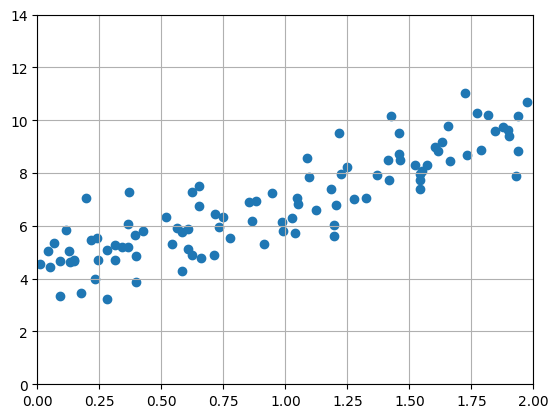

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 *X + np.random.randn(m,1)
plt.scatter(X,y)
plt.grid(True)
plt.axis(xmin=0.0,xmax=2.0,ymin=0.0,ymax=14.0)
plt.show()

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

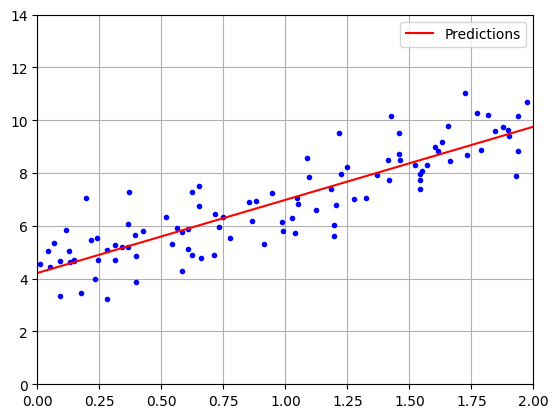

In [4]:
plt.plot(X,y,'b.')
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.grid(True)
plt.axis(xmin=0.0,xmax=2.0,ymin=0.0,ymax=14.0)
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [6]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient descent

### Batch GD (or full)

$\nabla_\theta MSE(\mathbf{\theta}) = \begin{pmatrix}\frac{\delta}{\delta\theta_0} MSE(\mathbf{\theta})\\\frac{\delta}{\delta\theta_1} MSE(\mathbf{\theta})\\\vdots\\\frac{\delta}{\delta\theta_n} MSE(\mathbf{\theta})\end{pmatrix} = \frac{2}{m}\mathbf{X}^{T}(\mathbf{X}\mathbf{\theta} - \mathbf{y})$ 

$\mathbf{\theta}^{(next step)} = \mathbf{\theta} - \eta\nabla_\theta MSE(\mathbf{\theta})$

In [7]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic GD

In [8]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2*xi.T@(xi@theta - yi)
        eta = learning_schedule(epoch *m +iteration)
        theta = theta - eta*gradients
theta

array([[4.21076011],
       [2.74856079]])

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Polynomial Regression

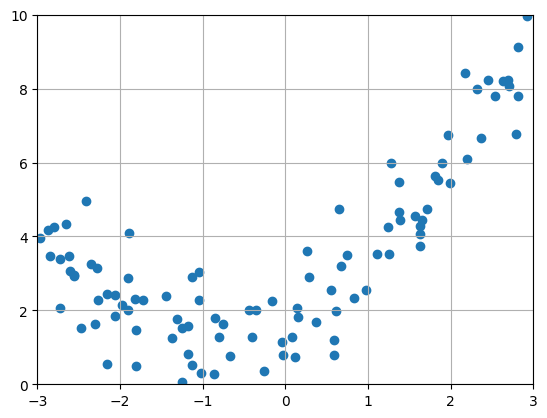

In [10]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
plt.scatter(X,y)
plt.axis(xmin=-3,xmax=3,ymin=0,ymax=10)
plt.grid(True)
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

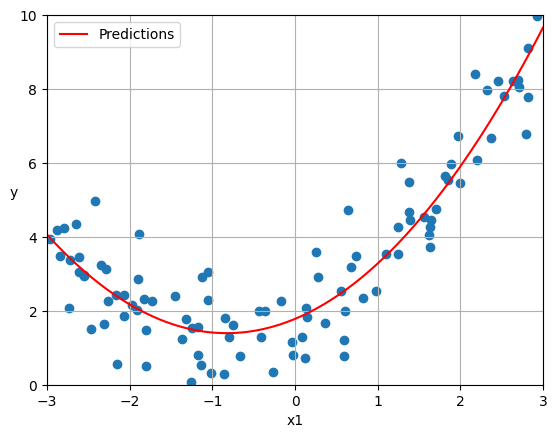

In [13]:
X_new = np.ndarray((200,1),buffer=np.linspace(-3,3,200))
plt.scatter(X,y)
plt.plot(X_new,lin_reg.predict(poly_features.transform(X_new)),'r-',label='Predictions')
plt.xlabel('x1')
plt.ylabel('y',rotation=0)
plt.legend()
plt.axis(xmin=-3,xmax=3,ymin=0,ymax=10)
plt.grid(True)
plt.show()

## Learning Curves

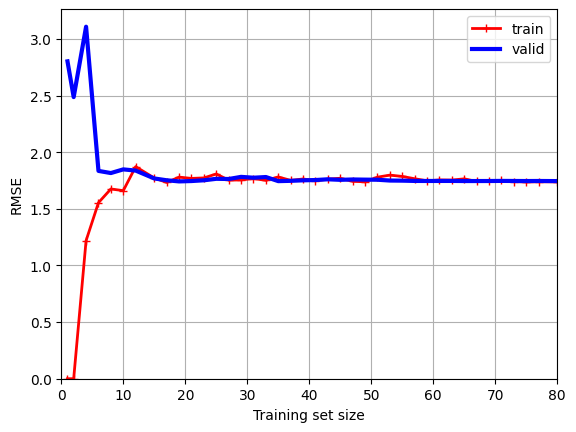

In [14]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(),X,y,
                                                         train_sizes=np.linspace(0.01,1.0,40),
                                                         cv=5,scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes,train_errors,'r-+', linewidth=2,label='train')
plt.plot(train_sizes,valid_errors,'b-', linewidth=3,label='valid')
plt.grid(True)
plt.axis(xmin=0,xmax=80,ymin=0)
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

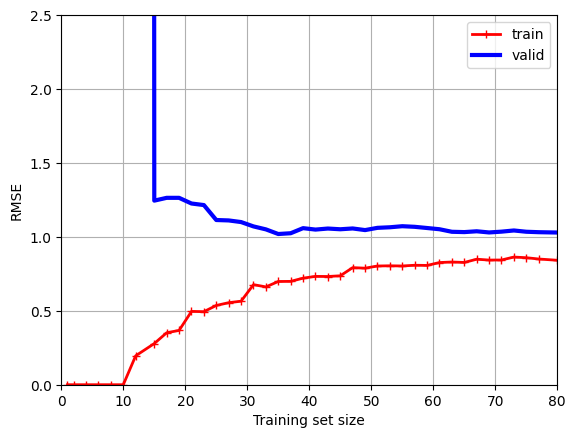

In [15]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression,X,y,
                                                         train_sizes=np.linspace(0.01,1.0,40),
                                                         cv=5,scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes,train_errors,'r-+', linewidth=2,label='train')
plt.plot(train_sizes,valid_errors,'b-', linewidth=3,label='valid')
plt.grid(True)
plt.axis(xmin=0,xmax=80,ymin=0,ymax=2.5)
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Regularized Linear Models

### Ridge Regression

Cost function: $J(\theta) = MSE(\theta) + \frac{\alpha}{m}\sum_{i = 1}^{n} \theta_{i}^2$  (bias not regularized) \
$\hat{\theta} = (\mathbf{X^T}\mathbf{X} + \alpha\mathbf{A})^{-1}\mathbf{X^T}\mathbf{y}$

In [16]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [17]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1/m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

### Laso Regression

Cost function: $J(\theta) = MSE(\theta) + 2 \alpha\sum_{i = 1}^{n} |\theta_{i}|$

### Elastic Net Regression

Cost function: $J(\theta) = MSE(\theta) + r (2 \alpha\sum_{i = 1}^{n} |\theta_{i}|) + (1-r) (\frac{\alpha}{m}\sum_{i = 1}^{n}\theta_{i}^2)$

### Early stopping

Detecting and saving hyperparameters and learned parameters of a minimum loss model

### Logistic Regression

$\hat{p} = h_{\theta}(\mathbf{x}) = \sigma(\mathbf{\theta}^{T}\mathbf{x})$ \
Logistic -> $\sigma(.)$ is a sigmoid function, outputs between 0 and 1 \
$\sigma(t) = \frac{1}{1+exp(-t)}$

$$\hat{y} = 
\left\{
\begin{array}{l}
\text {0 if }\hat{p} < 0.5\\
\text{1 if } \hat{p} \ge 0.5
\end{array}
\right.
$$

Cost function per instance: $$c(\mathbf{\theta}) = 
\left\{
\begin{array}{l}
-log(\hat{p}) \text{ if y = 1}\\
-log(1-\hat{p}) \text{ if y = 0}
\end{array}
\right.
$$

Cost function for the whole training set:
$J{\theta} = -\frac{1}{m} \sum_{i = 1}^{m}[y^{(i)} log(\hat{p}^{(i)}) + (1 -y^{(i)}log(1 - \hat{p}^{(i)})]$ 

There isn't a closed form solution, but the function is convex \
$\frac{\delta}{\delta\theta_j}J(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^{m}(\sigma(\mathbf{\theta}^T\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}$

In [18]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [19]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [20]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

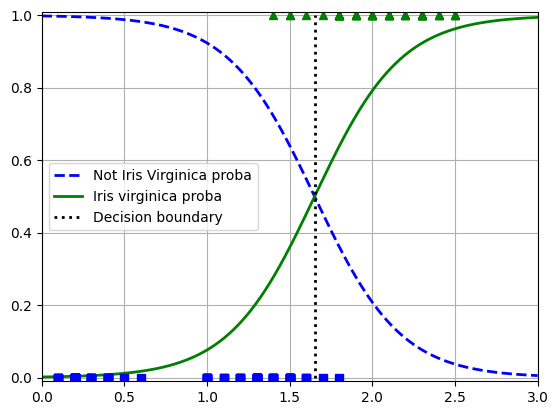

In [23]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0]
plt.plot(X_new,y_proba[:, 0], 'b--', linewidth=2,
         label='Not Iris Virginica proba')
plt.plot(X_new,y_proba[:,1], 'g-',linewidth=2,
         label='Iris virginica proba')
plt.plot([decision_boundary,decision_boundary], [0,1],'k:',
         linewidth=2, label='Decision boundary')
plt.plot(X[y != 1],y[y != 1],'bs')
plt.plot(X[y == 1],y[y == 1],'g^')
plt.axis(xmin=0.0,xmax=3.0,ymin=-0.01,ymax=1.01)
plt.grid(True)
plt.legend()
plt.show()

In [24]:
decision_boundary

1.6516516516516517

In [25]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

### Softmax Regression
It's a modification of logit reg to support multiclass. It assigns a probability of belonging to each class

In [26]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
softmax_reg = LogisticRegression(C=30,random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(C=30, random_state=42)

In [27]:
softmax_reg.predict([[5, 2]])

array([2])

In [28]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.03, 0.97]])

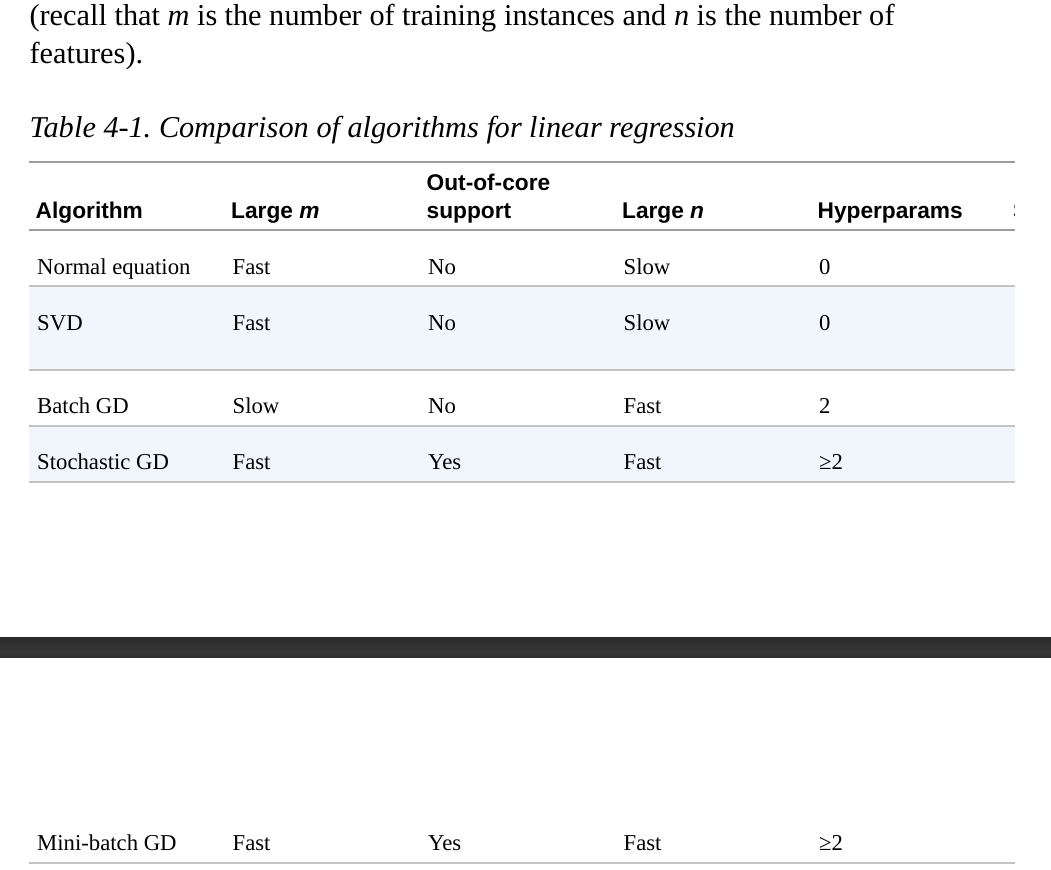

## Exercises

1. Which linear regression training algorithm can you use if you have a
 training set with millions of features?
    Any variant of GD
2. Suppose the features in your training set have very different scales. Which
algorithms might suffer	from this, and how?	What can you do about it?
    All of them. Scale the features
3. Can gradient descent get stuck in a local minimum when training a logistic
 regression	model?
    Not, because the function is convex
4. Do all gradient descent algorithms lead to the same model, provided you let
 them run long enough?
    Not necesarily, learnig rate also influences. Stochastic may never fully converge to the global minimum due to its inherent randomness.
5. Suppose you use batch gradient descent and you plot the validation error at
 every epoch. If you notice that the validation error consistently goes up,
 what is likely	going on? How can you fix this?
    The proble could be the model, too complex or too simple, the learning schedule or the nature of the test set and validation set
6. Is it a good idea to stop mini-batch gradient descent immediately when the
 validation error goes up?
    No, it is important to watch the long term trend
7. Which gradient descent algorithm (among those we discussed) will reach
 the vicinity of the optimal solution the fastest? Which will actually
 converge? How can you make the others converge as well?
    SGD
    Batch GD
    Tweaking the learning schedule, using early stopping and/or regularization
8. Suppose you are using polynomial regression. You plot the learning curves
 and you notice that there is a large gap between the training error and the
 validation	error.	What is happening? What are three ways to solve this?   
    The model is overfitting the training data. To solve this, I would try to simplify the model using a lower degree,
   I would try regularization and adding more data
9. Suppose you are using ridge regression and you notice that the training
 error and the validation error are almost equal and fairly high. Would you
 say that the model suffers from high bias or high variance? Should you
 increase the regularization hyperparameter α or reduce it?
    High bias. Reduce alpha
10. Why would you want to use:
    a. Ridge regression instead of plain linear regression (i.e., without any regularization)?
        To reduce the model complexity and reduce overfitting
    b. Lasso instead of ridge regression?
        When I think that only a few features are important
    c. Elastic net instead of lasso regression?
        When I think there are many correlated features, to obtain the advantages of l1 and l2
11. Suppose you want to classify pictures as outdoor/indoor and
 daytime/nighttime. Should you implement two logistic regression classifiers
 or one softmax regression classifier?
    Two logistics

12. Implement batch gradient descent with early stopping for softmax
regression without using Scikit-Learn, only NumPy. Use it on a
 classification task such as the iris dataset

In [56]:
import pandas as pd
X = iris.data.values
y = iris.target.values
X_with_bias = np.c_[np.ones(len(X)),X]

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size*test_ratio)
validation_size = int(total_size*validation_ratio)
train_size = total_size-test_size-validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_val = X_with_bias[rnd_indices[train_size:-test_size]]
y_val = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [59]:
def to_one_hot(y):
    return np.diag(np.ones(y.max()+1))[y]
y_train[:10],to_one_hot(y_train[:10])

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1]),
 array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.]]))

In [60]:
Y_train_oh = to_one_hot(y_train)
Y_val_oh = to_one_hot(y_val)
Y_test_oh = to_one_hot(y_test)

In [61]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)

X_train[:, 1:] = (X_train[:, 1:]-mean)/std
X_val[:, 1:] = (X_val[:, 1:]-mean)/std
X_test[:, 1:] = (X_test[:, 1:]-mean)/std

In [62]:
def softmax(logits):
    exps = np.exp(logits)
    exps_sums = exps.sum(axis=1,keepdims=True)
    return exps/exps_sums

In [63]:
n_inputs = X_train.shape[1]  # == 5 (4 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)

In [70]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs,n_outputs)

for epoch in range(n_epochs):
    logits = X_train@Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_val = softmax(X_val@Theta)
        xentropy_losses = -(Y_val_oh * np.log(Y_proba_val + epsilon))
        print(epoch,xentropy_losses.sum(axis=1).mean())

    error = Y_proba - Y_train_oh
    gradients = 1/m * X_train.T@error
    Theta = Theta - eta * gradients
Theta

0 4.626481998690278
1000 0.11433651664960794
2000 0.09771828547727754
3000 0.09482470188955566
4000 0.09774000000102671
5000 0.10314574163778194


array([[ 1.23389181,  6.24071307, -6.46846648],
       [-2.52703783,  2.47299879,  1.10877856],
       [ 3.64053358,  0.04103479, -1.80439521],
       [-5.10552678, -2.6481553 ,  7.36709468],
       [-5.3114502 , -2.65232032,  4.56753472]])

In [69]:
logits = X_val @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_val).mean()
accuracy_score

0.9666666666666667

In [72]:
# With l2 regularization
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01  # regularization hyperparameter

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_val = softmax(X_val @ Theta)
        xentropy_losses = -(Y_val_oh * np.log(Y_proba_val + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_oh
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 4.6922
1000 0.2835
2000 0.2834
3000 0.2834
4000 0.2834
5000 0.2834


In [74]:
logits = X_val @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_val).mean()
accuracy_score

0.9333333333333333

In [75]:
# Early stopping
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100  # regularization hyperparameter
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_val = softmax(X_val @ Theta)
    xentropy_losses = -(Y_val_oh * np.log(Y_proba_val + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping!")
        break
    error = Y_proba - Y_train_oh
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 4.6922
1000 0.2835
2000 0.2834
3000 0.2834
4000 0.2834
5000 0.2834
5418 0.2834
5419 0.2834 early stopping!


In [76]:
logits = X_val @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_val).mean()
accuracy_score

0.9333333333333333

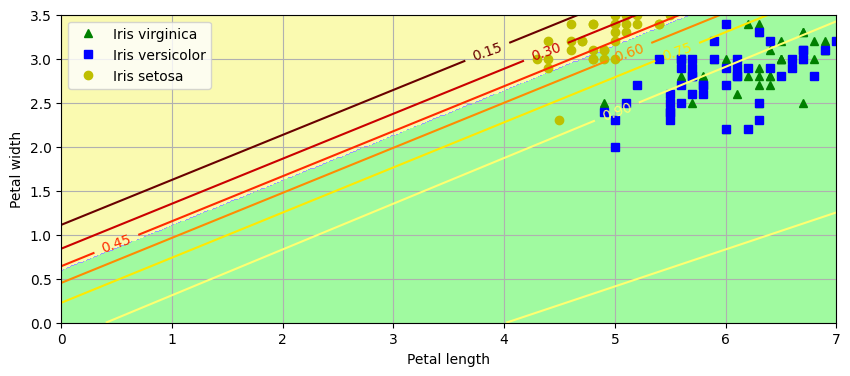

In [83]:
import matplotlib as mpl

custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean[:2]) / std[:2]
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta[0:3,:]
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

In [84]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667